# Project Business Statistics: E-news Express

**Marks: 60**

Submitted by: Neha Biswas

## Define Problem Statement and Objectives

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? 

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the Data into a DataFrame

In [ ]:
# Loading the dataset : 
df = pd.read_csv('/content/drive/MyDrive/Univ_Texas/Business_Statistics/Project/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# Checking the first 5 rows of the dataset:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# Checking the last 5 rows of the dataset:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


Observation: 

*   The DataFrame has 6 columns. Each row represents the engagement details of a user for the news website.


In [ ]:
# Checking the shape of the dataset: 
print(df.shape)
print(f'No. of rows in the dataset: {df.shape[0]}.')
print(f'No. of columns in the dataset: {df.shape[1]}.')

(100, 6)
No. of rows in the dataset: 100.
No. of columns in the dataset: 6.


Observation: 

*   The number of columns present in the dataset is 6. 
*   The number of rows present in the dataset is 100.



In [ ]:
# Info table for the dataset : 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Observations: 

*   The columns have int, float, and object datatypes.
*   4 columns that are of object datatype are group, landing_page, converted and language preferred.
*   There is 1 column whose datatype is int, namely user_id.
*   There is 1 column whose datatype is float, namely time_spent_on_the_page.



In [ ]:
# Statistical Summary of numerical columns of the dataset :
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [ ]:
# Since the column user_id is a key column, 
# the below code gives us the statistical summary of the only numerical column in the dataset (ie, time_spent_on_the_page).
df[['time_spent_on_the_page']].describe().T

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [ ]:
# Statistical Summary of categorical columns of the dataset :
df.describe(include='object').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


Observations: 

*   The column user_id is a  key column. Since pandas interpret the column as 'int', it is included in the summary table.
*   There are 2 unique values for each of the columns, group, landing_page, and converted. 
*   There are 3 unique values for the preferred languages of the website.
*   The minimum time a user spends on the website is 0.19 mins while the maximum time is 10.71 mins, with an average time of around 5.38 mins. 
*   The standard deviation for time spent by the user on the website is around 2.34.
*   The median time spent by a user on the website is around 5.42 mins which is slightly more than the average time spent.











In [ ]:
# Checking for missing values: 
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
# Checking for duplicate rows : 
df.duplicated().sum()

0

Observations: 

*   There are no missing values of data in any of the columns.
*   There are no duplicate users in the dataset.
*   There are no duplicate records in the dataset.


In [ ]:
df.query('group=="control"')['landing_page'].unique()

array(['old'], dtype=object)

In [ ]:
df.query('group=="treatment"')['landing_page'].unique()

array(['new'], dtype=object)

### Univariate Analysis

#### Time spent on the page

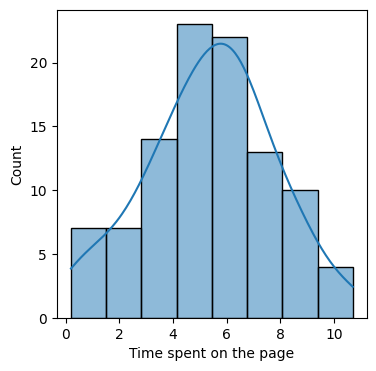

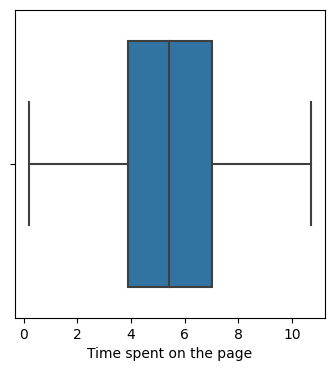

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'time_spent_on_the_page':
plt.figure(figsize=(4,4))
sns.histplot(data=df,x='time_spent_on_the_page', kde = True)
plt.xlabel('Time spent on the page')
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.xlabel('Time spent on the page')
plt.show()

In [ ]:
df['time_spent_on_the_page'].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

Observations:

*   The boxplot for 'time_spent_on_the_page' is almost symmetrical with no outliers.
*   The average value of time spent on the page by users is around 5.38 mins.
*   The median value of time spent on the page is slightly more than that of the average value at around 5.42 mins.
*   The minimum value of time spent on the page is 0.19 mins while the maximum time spent is 10.71 mins.
*   The standard deviation for the same is around 2.38.

In [ ]:
# Shapiro_Wilk's Test to check for normality of time spent by users on the landing page:

# Null Hypothesis: The time spent on the page by users follow a normal distribution.
# Alternate Hypothesis: The time spent on the page by users does not follow a normal distribution.

from scipy import stats
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

if p_value<=0.05:
  print('We reject the null hypothesis at 5% significance level.')
else :
  print('We fail to reject the null hypothesis at 5% significance level.')

The p-value is 0.5643193125724792
We fail to reject the null hypothesis at 5% significance level.


Observation: 
*   We conclude that the column 'time_spent_on_the_page' follows a normal distribution.




#### Group

In [ ]:
# Checking for unique values in 'group' column:
print(f'The unique groups in the dataset are :')
list(df['group'].unique())

The unique groups in the dataset are :


['control', 'treatment']

In [ ]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

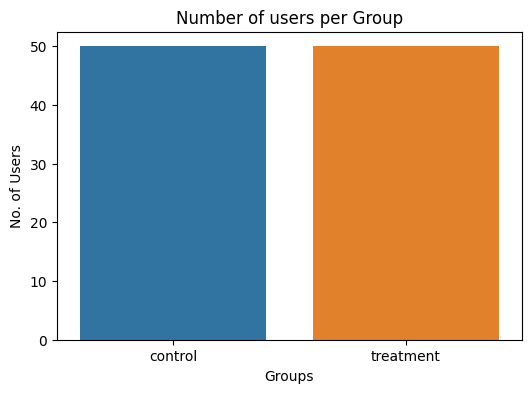

In [ ]:
# Countplot for number of users per group : 
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='group')
plt.xlabel('Groups')
plt.ylabel('No. of Users')
plt.title('Number of users per Group')
plt.show()

Observations: 

*   There are 2 unique groups in the dataset, i.e, control and treatment.  
*   The existing landing page was served to the control group and the new landing page was to the treatment group.
*   There are 50 users each in the control and treatment groups. 


#### Landing page

In [ ]:
print(f'The unique landing pages in the dataset are :')
list(df['landing_page'].unique())

The unique landing pages in the dataset are :


['old', 'new']

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

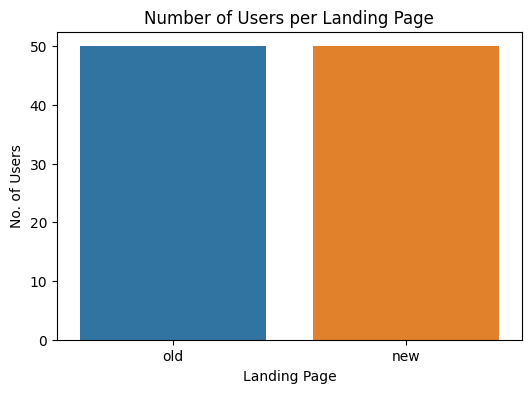

In [ ]:
# Countplot for number of users by landing page: 
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='landing_page')
plt.xlabel('Landing Page')
plt.ylabel('No. of Users')
plt.title('Number of Users per Landing Page')
plt.show()

Observations: 

*   There are 2 unique landing pages in the dataset, old and new. 
*   Old Landing page refers to the previous version of the landing page in the website and the new landing page refers to the newer version of the website with a new outline and more relevant content shown as compared to the old page.
*   There are 50 users on each of the old and the new landing pages.



#### Converted

In [ ]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [ ]:
converted_details = df.groupby('converted').agg(converted_count=('converted','count')).reset_index()
converted_details['percent_converted'] = (converted_details['converted_count']/converted_details['converted_count'].sum())*100
converted_details

,converted,converted_count,percent_converted
0,no,46,46.0
1,yes,54,54.0


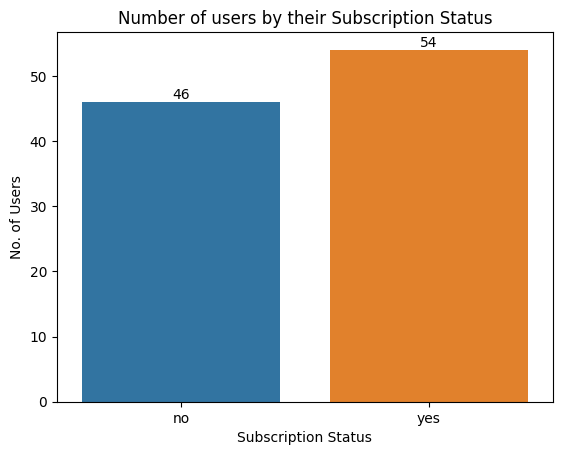

In [ ]:
# Countplot for number of users vs converted : 
graph = sns.countplot(data=df,x='converted')

for i in graph.containers: 
  graph.bar_label(i,)
  
plt.xlabel('Subscription Status')
plt.ylabel('No. of Users')
plt.title('Number of users by their Subscription Status')
plt.show()

In [ ]:
conversion_rate_df = df.groupby(['landing_page','converted']).agg(conversion_count=('converted','count')).reset_index()

# Conversion rate for old landing page:
conv_old_df = conversion_rate_df.query('landing_page=="old"')
conv_rate_old = conv_old_df.query('converted=="yes"')['conversion_count']/conv_old_df['conversion_count'].sum()
print(f'Conversion rate for old landing page is {conv_rate_old[3]}.')

# Conversion rate for new landing page:
conv_new_df = conversion_rate_df.query('landing_page=="new"')
conv_rate_new = conv_new_df.query('converted=="yes"')['conversion_count']/conv_old_df['conversion_count'].sum()
print(f'Conversion rate for new landing page is {conv_rate_new[1]}.')

Conversion rate for old landing page is 0.42.
Conversion rate for new landing page is 0.66.


Observations: 

*   There are 2 unique values for the column 'converted' in the dataset, i.e, yes and no.
*   Converted = 'yes' refers to the users who have subscribed to the news website and converted = 'no' refers to the users who have not subscribed. 
*   The total number of subscribers(i.e, 54) is more than that of non-subscribers(i.e, 46). 
*   Conversion rate for old landing page is 42% while that of the new landing page is 66%.
*   Overall, there is an increase in the conversion rate after implementing the new landing page.










#### Language preferred

In [ ]:
list(df['language_preferred'].unique())

['Spanish', 'English', 'French']

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

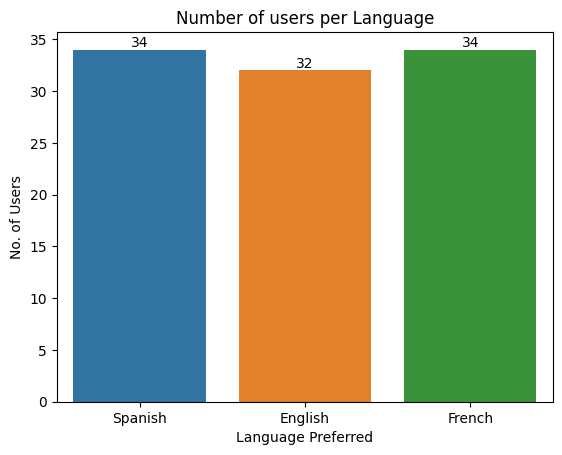

In [ ]:
# Countplot for number of users vs language_preferred : 
graph = sns.countplot(data=df,x='language_preferred')

for i in graph.containers: 
  graph.bar_label(i,)
  
plt.xlabel('Language Preferred')
plt.ylabel('No. of Users')
plt.title('Number of users per Language')
plt.show()

Observations: 

*   There are 3 unique languages in the dataset, i,e. English, French, and Spanish.
*   The no. of French and Spanish users(ie, 34 each) of the website is higher as compared to English(i.e, 32)

### Bivariate Analysis

#### Groups vs Preferred Language

In [ ]:
# Crosstab for no. of users by different groups wrt preferred language:
print(pd.crosstab(df['group'],df['language_preferred']))

language_preferred  English  French  Spanish
group                                       
control                  16      17       17
treatment                16      17       17


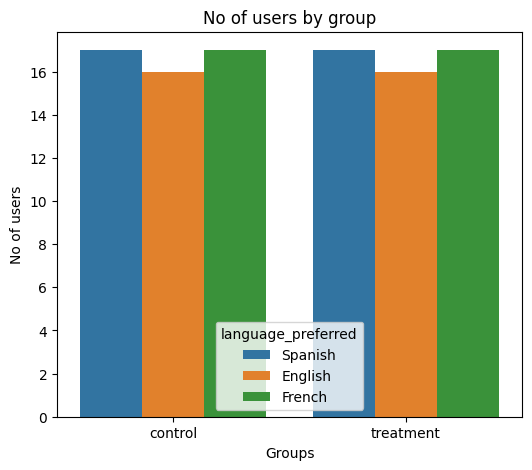

In [ ]:
# Countplot for number of users per group by preferred language: 
plt.figure(figsize=(6,5))
graph = sns.countplot(data=df,x='group', hue='language_preferred' )
plt.xlabel('Groups')
plt.ylabel('No of users')
plt.title('No of users by group')
plt.show()

Observation: 

*   There are 50 users each in the control and treatment groups. 
*   Based on the sample data, the data has the following number of users concerning preferred language in the control group: 

| Language     | Number of users |
| ------------ | --------------- |
| Spanish      |             17  |
| French       |             17  |
| English      |             16  |

*   Based on the sample data, the data has the following number of users concerning preferred language in the treatment group:

| Language     | Number of users |
| ------------ | --------------- |
| Spanish      |             17  |
| French       |             17  |
| English      |             16  |



#### Landing Page vs Preferred Language

In [ ]:
# Crosstab for no. of users by landing page wrt preferred language:
print(pd.crosstab(df['language_preferred'],df['landing_page']))

landing_page        new  old
language_preferred          
English              16   16
French               17   17
Spanish              17   17


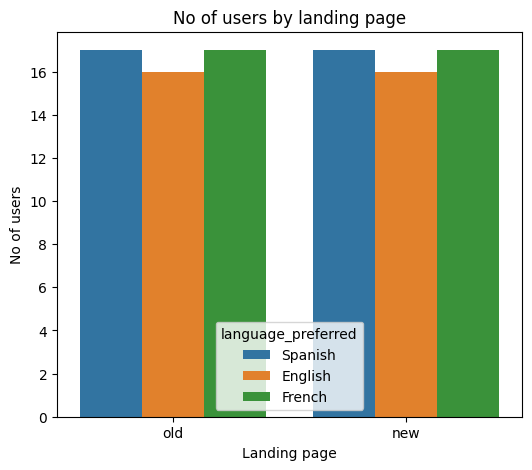

In [ ]:
# Countplot for number of users per landing page by preferred language: 
plt.figure(figsize=(6,5))
graph = sns.countplot(data=df,x='landing_page', hue='language_preferred' )
plt.xlabel('Landing page')
plt.ylabel('No of users')
plt.title('No of users by landing page')
plt.show()

Observations: 
*   Based on the sample data, following are the number of users of the old landing page with respect to preferred language: 

| Language     | Number of users |
| ------------ | --------------- |
| Spanish      |             17  |
| French       |             17  |
| English      |             16  |

*   Based on the sample data, following are the number of users of the new landing page with respect to preferred language:

| Language     | Number of users |
| ------------ | --------------- |
| Spanish      |             17  |
| French       |             17  |
| English      |             16  |


#### Landing Page vs Converted

In [ ]:
# Crosstab for no. of converted users wrt landing page:
print(pd.crosstab(df['landing_page'],df['converted']))

converted     no  yes
landing_page         
new           17   33
old           29   21


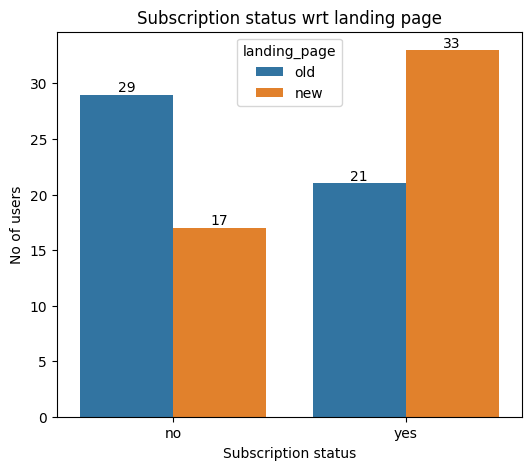

In [ ]:
# Countplot for number of users by converted status by landing page: 
plt.figure(figsize=(6,5))
graph = sns.countplot(data=df,x='converted', hue='landing_page' )

for i in graph.containers: 
  graph.bar_label(i,)

plt.xlabel('Subscription status')
plt.ylabel('No of users')
plt.title('Subscription status wrt landing page')
plt.show()

In [ ]:
# Crosstab for no. of converted users wrt landing page and languages:
print(pd.crosstab([df['landing_page'],df['language_preferred']],df['converted']))

converted                        no  yes
landing_page language_preferred         
new          English              6   10
             French               5   12
             Spanish              6   11
old          English              5   11
             French              14    3
             Spanish             10    7


In [ ]:
# No. of subscribers wrt landing_page, language_preferred
converted_language_df = df.groupby(['landing_page','language_preferred','converted']).agg(converted_count=('converted','count'))
converted_language_df['converted_percent'] = converted_language_df['converted_count']/converted_language_df['converted_count'].sum()
converted_language_df.query('converted=="yes"')

converted_count  converted_percent
landing_page language_preferred converted                                    
new          English            yes                     10               0.10
             French             yes                     12               0.12
             Spanish            yes                     11               0.11
old          English            yes                     11               0.11
             French             yes                      3               0.03
             Spanish            yes                      7               0.07

Observations: 

*   For the old landing page, the percentage is users who subscribed to the website is the maximum for English users.
*   For the new landing page, the percentage is users who subscribed to the website is the maximum for French users.
*   There is an increase in the number of subscribers for the new landing page for users who prefer the languages French and Spanish.
*   There is a decrease in the number of subscribers for the new landing page for users who prefer English.


#### Landing page vs Time spent on the page

In [ ]:
df.query('landing_page=="old"')['time_spent_on_the_page'].describe()

count    50.000000
mean      4.532400
std       2.581975
min       0.190000
25%       2.720000
50%       4.380000
75%       6.442500
max      10.300000
Name: time_spent_on_the_page, dtype: float64

In [ ]:
df.query('landing_page=="new"')['time_spent_on_the_page'].describe()

count    50.000000
mean      6.223200
std       1.817031
min       1.650000
25%       5.175000
50%       6.105000
75%       7.160000
max      10.710000
Name: time_spent_on_the_page, dtype: float64

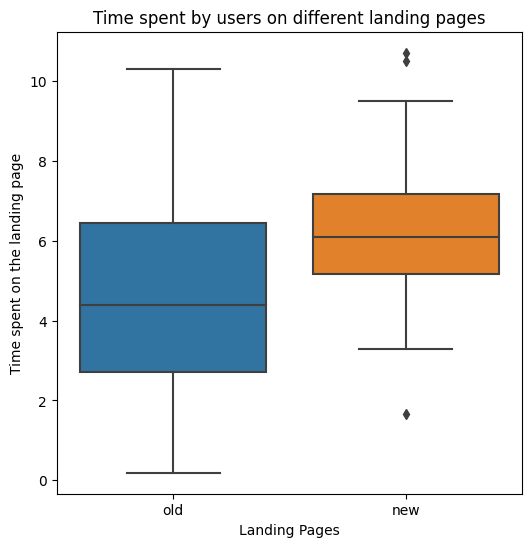

In [ ]:
# Boxplots to show the time spent by the users distributions on different landing pages:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.xlabel('Landing Pages')
plt.ylabel('Time spent on the landing page')
plt.title('Time spent by users on different landing pages')
plt.show()

Observations: 

*   The average time spent on the old landing page is around 4.53 mins, while that on the new landing page is around 6.22 mins. Therefore, there is an increase in the average time spent by users when the new landing page has been implemented. 
*   There is also an increase in the median value of time spent by users on the new landing page (around 6.11 mins) as compared to that on the old landing page (around 4.38 mins). 
*   The data is more spread out around the mean in the case of old landing page (standard deviation = 2.58) than that of new landing page (standard deviation = 1.82).
*    There is an increase in the minimum time spent by the user on the new landing page(around 1.65 mins) as compared to that on the older landing page (around 0.19 mins).
*    There is also a slight increase in the maximum time spent by the user on the new landing page(around 10.71 mins) as compared to that on the older landing page (around 10.30 mins).
*   There are a few outlier values of the time spent on the new landing page. 



#### Conversion status vs Time spent on the page

In [ ]:
df.query('converted=="yes"')['time_spent_on_the_page'].describe()

count    54.000000
mean      6.623148
std       1.708427
min       2.580000
25%       5.500000
50%       6.495000
75%       7.367500
max      10.710000
Name: time_spent_on_the_page, dtype: float64

In [ ]:
df.query('converted=="no"')['time_spent_on_the_page'].describe()

count    46.000000
mean      3.915870
std       2.226897
min       0.190000
25%       2.337500
50%       3.980000
75%       4.922500
max       9.150000
Name: time_spent_on_the_page, dtype: float64

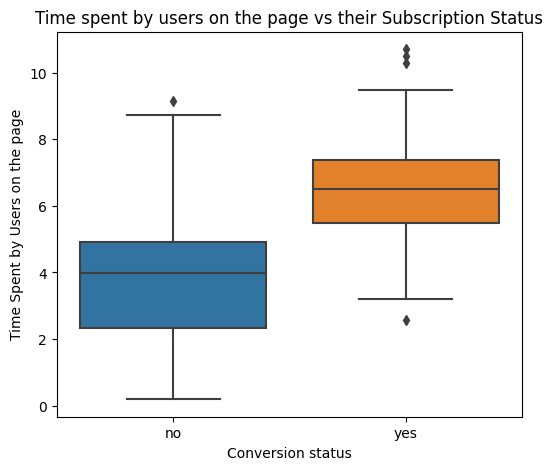

In [ ]:
# Boxplots to show the time spent by the users distributions wrt their conversion status:
plt.figure(figsize=(6,5))
sns.boxplot(data = df, x='converted', y='time_spent_on_the_page')
plt.xlabel('Conversion status')
plt.ylabel('Time Spent by Users on the page')
plt.title('Time spent by users on the page vs their Subscription Status')
plt.show()

Observations:

*   The average time spent on the page by subscribers is around 6.62 mins while that of non-subscribers is around 3.91 mins. Hence, subscribers spend more time on the website as compared to non-sunscribers. 
*   Similarly, the median value of time spent by subscribers on the page (around 6.50 mins) is more that that of non-subscribers(around 3.98 mins).
*   The data is more spread out around the mean in the case of non-subscribers (standard deviation = 2.23) than that of subscribers(standard deviation = 1.71)
*   The minimum time spent by subscribers on the page(around 2.58 mins) is more than that of non-subscribers(around 0.19 mins).
*   Similarly, the maximum time spent by subscribers on the page(around 10.71 mins) is also more than that of non-subscribers(around 9.15 mins).
*   There are a few outliers on the higher end of time spent for non-subscribers. The time spent in the case of subscribers has outlier values on both lower and higher ends.






#### Language preferred vs Time spent on the page

In [ ]:
df.query('language_preferred=="Spanish"')['time_spent_on_the_page'].describe()

count    34.000000
mean      5.331765
std       1.818095
min       0.190000
25%       4.475000
50%       5.605000
75%       6.515000
max       8.720000
Name: time_spent_on_the_page, dtype: float64

In [ ]:
df.query('language_preferred=="English"')['time_spent_on_the_page'].describe()

count    32.000000
mean      5.559062
std       2.621079
min       0.220000
25%       3.617500
50%       5.755000
75%       7.137500
max      10.500000
Name: time_spent_on_the_page, dtype: float64

In [ ]:
df.query('language_preferred=="French"')['time_spent_on_the_page'].describe()

count    34.000000
mean      5.253235
std       2.675413
min       0.400000
25%       3.395000
50%       5.315000
75%       7.367500
max      10.710000
Name: time_spent_on_the_page, dtype: float64

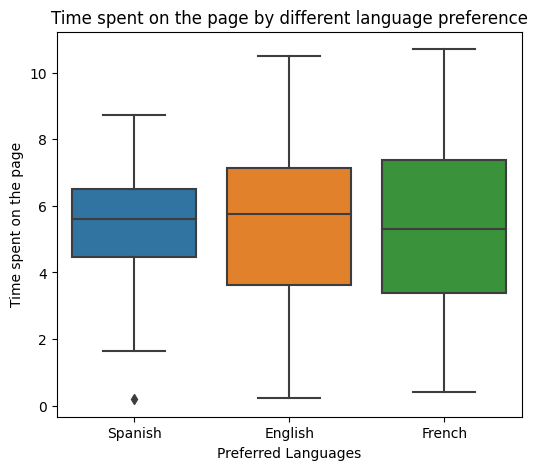

In [ ]:
# Boxplots to show the time spent by the users distibution wrt preferred languages:
plt.figure(figsize=(6,5))
sns.boxplot(data = df, x='language_preferred' , y='time_spent_on_the_page')
plt.xlabel('Preferred Languages')
plt.ylabel('Time spent on the page')
plt.title('Time spent on the page by different language preference')
plt.show()

Observations: 

*   Users whose preferred language is French(around 5.25 mins) have the lowest average value of time spent on the page, while those having English(around 5.56 mins) spend the most amount of time on the page. 
*   Similarly, users whose preferred language is French(around 5.31 mins) have the lowest median value of time spent on the page, while those having English(around 5.76 mins) have the most amount of median time on the page.
*   The minimum amount of time spent on the website by language preference is 0.19 mins for Spanish users. 
*   The maximum amount of time spent on the website by language preference is 10.71 mins for French users. 
*   There are outlier values on the lower end for time spent on the page by Spanish users.







## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

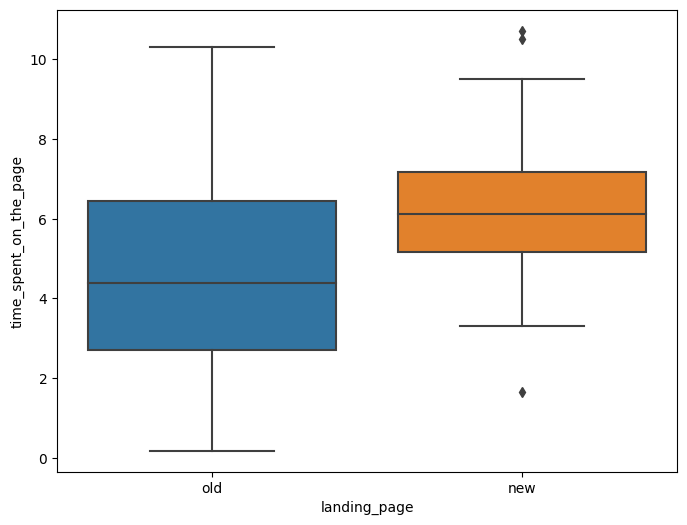

In [ ]:
# Visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.show()

### Step 1: Define the null and alternate hypotheses

**Null and alternative hypotheses**

Let $\mu_o$ be the mean time spent by users on the old landing page.<br> 
Let $\mu_n$ be the mean time spent by users on the new landing page.


The null hypothesis can be written as

>$H_0: \mu_n = \mu_o$

against the alternate hypothesis

>$H_a: \mu_n > \mu_o$

### Step 2: Select Appropriate test

In [ ]:
df_old_landing_page = df.query('landing_page == "old"')
df_new_landing_page = df.query('landing_page == "new"')

mu_bar_old_landing_page = df_old_landing_page['time_spent_on_the_page'].mean()
print(f'The average time spent by the users on old landing page is {round(mu_bar_old_landing_page,3)} mins.')
mu_bar_new_landing_page = df_new_landing_page['time_spent_on_the_page'].mean()
print(f'The average time spent by the users on new landing page is {round(mu_bar_new_landing_page,3)} mins.')

sigma_hat_old_landing_page = df_old_landing_page['time_spent_on_the_page'].std()
print(f'The standard deviation for time spent on the old landing page is {round(sigma_hat_old_landing_page,3)}.') 
sigma_hat_new_landing_page = df_new_landing_page['time_spent_on_the_page'].std()
print(f'The standard deviation for time spent on the new landing page is {round(sigma_hat_new_landing_page,3)}.') 

The average time spent by the users on old landing page is 4.532 mins.
The average time spent by the users on new landing page is 6.223 mins.
The standard deviation for time spent on the old landing page is 2.582.
The standard deviation for time spent on the new landing page is 1.817.


In [ ]:
# Shapiro_Wilk's Test to check for normality of time spent by users on the old landing page:

# Null Hypothesis: Time spent by users on the old landing page follows a normal distribution.
# Alternative Hypothesis: Time spent by users on the old landing page does not follow a normal distribution.

from scipy import stats
w, p_value = stats.shapiro(df_old_landing_page['time_spent_on_the_page']) 
print('The p-value is', p_value)

if p_value<=0.05:
  print('We reject the null hypothesis at 5% significance level.')
else :
  print('We fail to reject the null hypothesis at 5% significance level.')


The p-value is 0.45611920952796936
We fail to reject the null hypothesis at 5% significance level.


Hence, we fail to reject the null hypothesis that the time spent by users on the old landing page follows the normal distribution.

In [ ]:
# Shapiro_Wilk's Test to check for normality of time spent by users on the new landing page: 

# Null Hypothesis: Time spent by users on the new landing page follows a normal distribution.
# Alternative Hypothesis: Time spent by users on the new landing page does not follow a normal distribution.

from scipy import stats
w, p_value = stats.shapiro(df_new_landing_page['time_spent_on_the_page']) 
print('The p-value is', p_value)

if p_value<=0.05:
  print('We reject the null hypothesis at 5% significance level.')
else :
  print('We fail to reject the null hypothesis at 5% significance level.')

The p-value is 0.8040016293525696
We fail to reject the null hypothesis at 5% significance level.


Hence, we fail to reject the null hypothesis that the time spent by users on the new landing page follows the normal distribution.

In [ ]:
# Levene's test for population variance of time spent by users on the different landing pages.

# Null Hypothesis: Population variances for time spent on the new and old landing pages are equal.
# Alternative Hypothesis: Population variances for time spent on the new and old landing pages are not equal.

from scipy.stats import levene
statistic, p_value = levene(df_new_landing_page['time_spent_on_the_page'],
                            df_old_landing_page['time_spent_on_the_page'])
print('The p-value is', p_value)

if p_value<=0.05:
  print('We reject the null hypothesis at 5% significance level.')
else :
  print('We fail to reject the null hypothesis at 5% significance level.')

The p-value is 0.008950671168914447
We reject the null hypothesis at 5% significance level.


Hence, we reject the null hypothesis that the time spent by users on the new and old landing pages are equal.

Test Statistic Distribution : T Distribution.<br> 
Test Used for performing Hypothesis Testing: Two independent sample t-test.

Assumptions:
*   Continuous data - Yes, the time spent by users on the landing pages(old and new) is measured on a continuous scale.
*   Normally distributed populations - Yes, we can conclude from Shapiro Wilk's test (as above) that the populations are normal.
*   Independent populations - As we are taking random samples for two different groups, i,e. the old landing page and the new landing page, the two samples are from two independent populations.
*   Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different. We can draw the same conclusion from Levene's test(as above).
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.



### Step 3: Decide the significance level

$\alpha$ = 0.05

### Step 4: Collect and prepare data

In [ ]:
print(df_old_landing_page.head())

   user_id    group landing_page  time_spent_on_the_page converted  \
0   546592  control          old                    3.48        no   
3   546567  control          old                    3.02        no   
5   546558  control          old                    5.28       yes   
7   546581  control          old                    6.53       yes   
9   546548  control          old                    2.08        no   

  language_preferred  
0            Spanish  
3             French  
5            English  
7            Spanish  
9            English  


In [ ]:
print(df_new_landing_page.head())

   user_id      group landing_page  time_spent_on_the_page converted  \
1   546468  treatment          new                    7.13       yes   
2   546462  treatment          new                    4.40        no   
4   546459  treatment          new                    4.75       yes   
6   546448  treatment          new                    5.25       yes   
8   546461  treatment          new                   10.71       yes   

  language_preferred  
1            English  
2            Spanish  
4            Spanish  
6             French  
8             French  


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
test_stat, p_value = ttest_ind(df_new_landing_page['time_spent_on_the_page'],
                               df_old_landing_page['time_spent_on_the_page'],
                               equal_var = False, 
                               alternative = 'greater')
print(f'Test Statistic Value : {test_stat}')
print(f'The p-value : {p_value}')

Test Statistic Value : 3.7867702694199856
The p-value : 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value<=0.05:
  print('We reject the null hypothesis at 5% significance level.')
else :
  print('We fail to reject the null hypothesis at 5% significance level.')

We reject the null hypothesis at 5% significance level.


### Step 7:  Draw inference

*   Since the p-value is less than 0.05 (5% significance level), we reject the null hypothesis.
*   Hence, we have enough statistical evidence to say that the mean time spent by users on the new landing page is greater than the mean time spent by users on the old landing page. 
*   So, we can conclude that the users are spending more time on the new landing page than the existing landing page.




## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Conversion rate is the proportion of users who visit the landing page and get converted. For example, out of 50 users, 20 get converted, then the conversion rate is 20/50 =0.4

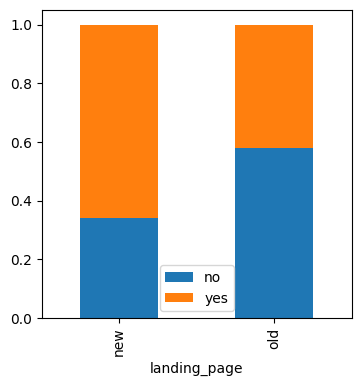

In [ ]:
# Visually comparing the conversion rates for the new and the old landing pages:
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(4,4),stacked=True)
plt.legend()
plt.show()

In [ ]:
pd.crosstab(df['landing_page'],df['converted'])

converted,no,yes
landing_page,,
new,17,33
old,29,21


### Step 1: Define the null and alternate hypotheses

**Null and alternative hypotheses**

Let $p_1,p_2$ be the conversion rates of the old landing page and new landing page respectively.

The null hypothesis can be written as

>$H_0:p_2 = p_1$

against the alternate hypothesis

>$H_a:p_2 > p_1$

### Step 2: Select Appropriate test

Test Statistic Distribution : Standard Normal distribution.<br> 
Test Used for performing Hypothesis testing : Two proportions z-test.

Assumptions:
*   Binomally distributed population - Yes, a user gets either converted(subscribes to the website) or not-converted(does not subscribe).
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-21}{50} =29 \geq 10 \\
np_2 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-33}{50} =17 \geq 10 $



### Step 3: Decide the significance level

$\alpha$ = 0.05

### Step 4: Collect and prepare data

In [ ]:
conversion_nos = np.array([df_new_landing_page.query('converted =="yes"').shape[0],
                           df_old_landing_page.query('converted =="yes"').shape[0]])
print(f'The conversion count for new and old landing pages are {conversion_nos[0]} and {conversion_nos[1]} respectively.')
nobs = np.array([df_new_landing_page.shape[0],
                 df_old_landing_page.shape[0]])
print(f'The total number of users for new and old landing pages are {nobs[0]} and {nobs[1]} respectively.')

The conversion count for new and old landing pages are 33 and 21 respectively.
The total number of users for new and old landing pages are 50 and 50 respectively.


### Step 5: Calculate the p-value

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
test_stat, p_value = proportions_ztest(conversion_nos, nobs, alternative='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value<=0.05:
  print('We reject the null hypothesis at 5% significance level.')
else :
  print('We fail to reject the null hypothesis at 5% significance level.')

We reject the null hypothesis at 5% significance level.


### Step 7:  Draw inference

*   Since the p-value is less than 0.05 (5% significance level), we reject the null hypothesis.
*   Hence, we have enough statistical evidence to say the conversion rate of the new landing page is greater than that of the old landing page. 
*   So, we can conclude that the users are subscribing to the website more on the new landing page than the existing landing page.

## 3. Is the conversion and preferred language are independent or related?

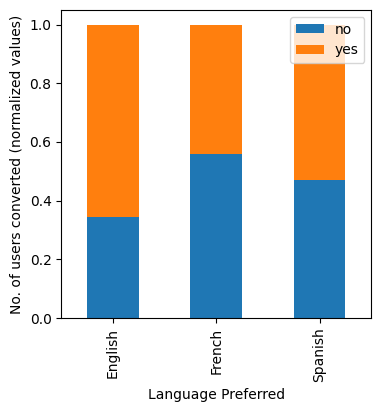

In [ ]:
# Plotting the dependency between conversion status and preferred langauge
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(4,4), stacked=True)
plt.xlabel('Language Preferred')
plt.ylabel('No. of users converted (normalized values)')
plt.legend()
plt.show()

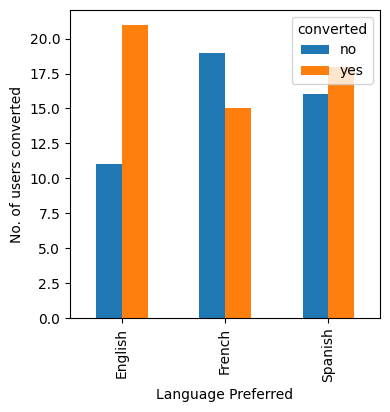

In [ ]:
pd.crosstab(df['language_preferred'],df['converted']).plot(kind="bar", figsize=(4,4))
plt.xlabel('Language Preferred')
plt.ylabel('No. of users converted')
plt.show()

### Step 1: Define the null and alternate hypotheses

**Null and alternative hypotheses**

The null hypothesis can be written as

>$H_{0}$: Conversion of a user and preferred language are independent. 

against the alternate hypothesis

>$H_{a}$: Conversion of a user and preferred language are not independent. In other words, the conversion status of a user is dependent on their language preference.

### Step 2: Select Appropriate test

In [ ]:
pd.crosstab(df['language_preferred'],df['converted'])

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


Test Statistic Distribution: Chi-Square Distribution<br> 
Test Used for performing Hypothesis Testing: Chi-square test of independence.

Assumptions:
* Categorical variables - Yes, the variables used for the test (converted and language_preferred) are categorical.  
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 3: Decide the significance level

$\alpha$ = 0.05

### Step 4: Collect and prepare data

In [ ]:
contingency_table = pd.crosstab(df['language_preferred'],df['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
# we use chi2_contingency() to find the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value<=0.05:
  print('We reject the null hypothesis at 5% significance level.')
else :
  print('We fail to reject the null hypothesis at 5% significance level.')

We fail to reject the null hypothesis at 5% significance level.


### Step 7:  Draw inference

*   Since the p-value is greater than 0.05 (5% significance level), we fail to reject the null hypothesis.
*   Hence, we do not have enough statistical evidence to say the conversion status of a user is dependent on their language preference. 
*   So, we can conclude that conversion status and language preference are independent.

## 4. Is the time spent on the new page same for the different language users?

In [ ]:
df_new_landing_page.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [ ]:
# Sample mean times spent by the users on the new landing page for different preferred languages.
df_new_landing_page.groupby('language_preferred').agg(mean_time=('time_spent_on_the_page','mean')).reset_index()

,language_preferred,mean_time
0,English,6.663750
1,French,6.196471
2,Spanish,5.835294


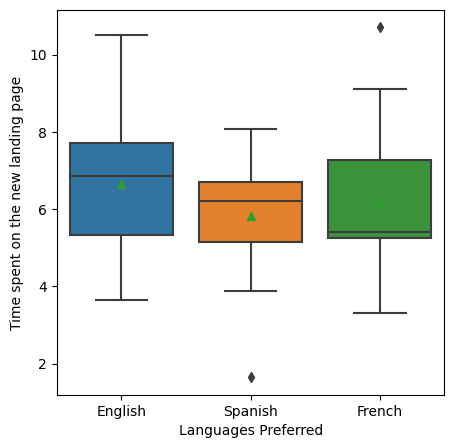

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data = df_new_landing_page, x='language_preferred', y ='time_spent_on_the_page', showmeans = True)
plt.xlabel('Languages Preferred')
plt.ylabel('Time spent on the new landing page')
plt.show()

### Step 1: Define the null and alternate hypotheses

**Null and alternative hypotheses**

The null hypothesis can be written as

>$H_{0}$: The average time spent on the new landing page is the same for the different language users. In other words, the mean time spent on the new landing page by English, French, and Spanish users is equal.

against the alternate hypothesis

>$H_{a}$: At least one of the average times spent on the new landing page for different language users is different from the rest. In other words, at least one of the mean times spent on the new page by English, French, and Spanish users is unequal. 


### Step 2: Select Appropriate test

Test Statistic Distribution : F Distribution<br> 
Test Used for performing Hypothesis testing : One-way ANOVA F-test.

Assumptions:

*   Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
*   The populations are normally distributed - Yes, we can conclude from the Shapiro- Wilks test that the populations of users who prefer different languages is normally distributed (as shown below).
*   Population variances are equal - Yes, we can conclude from Levene's test that the population variances of users who prefer different languages are equal (as shown below).

Shapiro-Wilk’s test for testing normality of time spent on the new landing page:

The null hypothesis can be written as

>$H_0:$ Time spent on the new landing page follows a normal distribution.

against the alternate hypothesis 

>$H_a:$ Time spent on the new landing page does not follow a normal distribution. 

In [ ]:
# Shapiro_Wilk's Test for Time spent on the new landing page for users who prefer the language 'English': 

# Null Hypothesis: The time spent on the new landing page by users who prefer English follows a normal distribution.
# Alternate Hypothesis: The time spent on the new landing page by users who prefer English does not follow a normal distribution.

from scipy import stats
w, p_value = stats.shapiro(df_new_landing_page.loc[df_new_landing_page['language_preferred']=='English','time_spent_on_the_page']) 
print('The p-value is', p_value)

if p_value<=0.05:
  print('We reject the null hypothesis at 5% significance level.')
else :
  print('We fail to reject the null hypothesis at 5% significance level.')

The p-value is 0.8863451480865479
We fail to reject the null hypothesis at 5% significance level.


Observation:<br> 
We conclude that the values for the time spent on the new landing page for users who prefer the English language follow a normal distribution.

In [ ]:
# Shapiro_Wilk's Test for Time spent on the new landing page for users who prefer the language 'Spanish': 

# Null Hypothesis: The time spent on the new landing page by users who prefer Spanish follows a normal distribution.
# Alternate Hypothesis: The time spent on the new landing page by users who prefer Spanish does not follow a normal distribution.

from scipy import stats
w, p_value = stats.shapiro(df_new_landing_page.loc[df_new_landing_page['language_preferred']=='Spanish','time_spent_on_the_page']) 
print('The p-value is', p_value)

if p_value<=0.05:
  print('We reject the null hypothesis at 5% significance level.')
else :
  print('We fail to reject the null hypothesis at 5% significance level.')

The p-value is 0.09006832540035248
We fail to reject the null hypothesis at 5% significance level.


Observation:<br> 
We conclude that the values for the time spent on the new landing page for users who prefer the Spanish language follow a normal distribution.

In [ ]:
# Shapiro_Wilk's Test for Time spent on the new landing page for users who prefer the language 'French':

# Null Hypothesis: The time spent on the new landing page by users who prefer French follows a normal distribution.
# Alternate Hypothesis: The time spent on the new landing page by users who prefer French does not follow a normal distribution.

from scipy import stats
w, p_value = stats.shapiro(df_new_landing_page.loc[df_new_landing_page['language_preferred']=='French','time_spent_on_the_page']) 
print('The p-value is', p_value)

if p_value<=0.05:
  print('We reject the null hypothesis at 5% significance level.')
else :
  print('We fail to reject the null hypothesis at 5% significance level.')

The p-value is 0.3213688135147095
We fail to reject the null hypothesis at 5% significance level.


Observation:<br> 
We conclude that the values for the time spent on the new landing page for users who prefer the French language follows a normal distribution.

Levene’s test for testing variances of time spent on the new landing page scored:

The null hypothesis can be written as

>$H_0$: All the population variances are equal.

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest.

In [ ]:
# Levene's test for population variance of time spent by users who prefer different languages on the new landing page. 
from scipy.stats import levene
statistic, p_value = levene(df_new_landing_page.loc[df_new_landing_page['language_preferred']=='English', 'time_spent_on_the_page'],
                            df_new_landing_page.loc[df_new_landing_page['language_preferred']=='Spanish', 'time_spent_on_the_page'],
                            df_new_landing_page.loc[df_new_landing_page['language_preferred']=='French', 'time_spent_on_the_page'])
print('The p-value is', p_value)

if p_value<=0.05:
  print('We reject the null hypothesis at 5% significance level.')
else :
  print('We fail to reject the null hypothesis at 5% significance level.')

The p-value is 0.46711357711340173
We fail to reject the null hypothesis at 5% significance level.


Observation:<br> 
We can conclude that all the population variances are equal.

### Step 3: Decide the significance level

$\alpha$ = 0.05

### Step 4: Collect and prepare data

In [ ]:
df_new_landing_page.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import f_oneway

In [ ]:
# perform one-way anova test
test_stat, p_value = f_oneway(df_new_landing_page.loc[df_new_landing_page['language_preferred']=='English', 'time_spent_on_the_page'],
                            df_new_landing_page.loc[df_new_landing_page['language_preferred']=='Spanish', 'time_spent_on_the_page'],
                            df_new_landing_page.loc[df_new_landing_page['language_preferred']=='French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value<=0.05:
  print('We reject the null hypothesis at 5% significance level.')
else :
  print('We fail to reject the null hypothesis at 5% significance level.')

We fail to reject the null hypothesis at 5% significance level.


Multiple Comparison test (Tukey HSD)

Comparing the average time spent on the new landing page by users who have different preferred languages:<br>
Here, 𝜇_1, 𝜇_2, and 𝜇_3 represent the average times spent on the new landing page by users who prefer the languages English, Spanish, and French. 

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

In [ ]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df_new_landing_page['time_spent_on_the_page'], 
                           groups = df_new_landing_page['language_preferred'], 
                           alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7434 -2.0035  1.069  False
English Spanish  -0.8285 0.3995 -2.3647 0.7078  False
 French Spanish  -0.3612 0.8326  -1.874 1.1516  False
-----------------------------------------------------


### Step 7:  Draw inference

Observation:
*   Since the p-value from the one-way anova test is greater than 0.05 (5% significance level), we fail to reject the null hypothesis.
*   Hence, we do not have enough statistical evidence to say that at least one of the average time spent on the new landing page for different language users is different from the rest. 
*   So, the time spent on the new page is the same(almost) for the different language users(English,French and Spanish) which is also confirmed by the pairwise_tukeyhsd test. 








## Conclusion and Business Recommendations

### Conclusions: 

*   Based on the sample data, the minimum time a user spends on the website is 0.19 mins while the maximum time is 10.71 mins, with an average time of around 5.38 mins. 
  
*   Based on the sample data, there is an increase in the average time spent by users after the new landing page has been implemented.

| Landing Page | Average Time Spent on the page(mins) |
| ------------ | ------------------------------------ |
| New          |                                6.22  |
| Old          |                                4.53  |

*   Based on the sample data, there is an increase in conversion rates after the implementation of the new landing page.

| Landing Page | Conversion Rate(%) |
| ------------ | ------------------ |
| New          |                66  |
| Old          |                42  |

*   Based on the sample data, subscribers spend more time on the website as compared to non-subscribers.

| Conversion Status | Average Time Spent on the page(mins) |
| ----------------- | ------------------------------------ |
| Subscriber        |                                6.62  |
| Non-Subscriber    |                                3.91  |

*   Based on the sample data, there are 3 unique languages in the dataset, i,e. English, French, and Spanish. Also, in the sample data, the number of French users and Spanish users of the website is higher as compared to English users.

*   Based on the sample data, English users have the highest mean time spent on the page, while French users have the lowest mean time spent on the page.

| Preferred Language   | Average Time Spent on the page(mins) |
| -------------------- | ------------------------------------ |
| English              |                                5.56  |
| Spanish              |                                5.33  |
| French               |                                5.25  |

*   Based on the sample data, there is an increase in the number of subscribers for the new landing page for users who prefer the languages French and Spanish while there is a decrease in the number of subscribers for the new landing page for users who prefer English.

|Conversion Percentage(%) by Language | Old Landing Page   | New Landing Page |
|----------| -------------------- | ------------------------------------ |
| French  | 3 | 12  |
| Spanish | 7 | 11  |
| English | 11 | 10 |

*   We have enough statistical evidence to say that the mean time spent by users on the new landing page is greater than the mean time spent by users on the old landing page. So, we can conclude that the users are spending more time on the new landing page than on the existing landing page.

*   We have enough statistical evidence to say the conversion rate of the new landing page is greater than that of the old landing page. So, we can conclude that the users are subscribing to the website more on the new landing page than the existing landing page.

*   We do not have enough statistical evidence to say the conversion status of a user is dependent on their language preference. So, we conclude that conversion status and language preference are independent.

*   We do not have enough statistical evidence to say that at least one of the average times spent on the new landing page for different language users is different from the rest. So, we can conclude that the time spent on the new page is the almost same for the different language users(English, French and Spanish).



### Recommendations:

*   E-news Express should investigate the lower conversion rates of English users after the new landing page has been implemented.
*   E-news Express should analyse the browsing details of the users to ensure information is tailored to the user's preference thus increasing engagement. 
*   With better tailored information to the user, he/she will spend more time on the website which in turn leads to better conversion rates. 
*   E-news Express can recommened the categories of news to the user based on their preferences. Also, headlines relating to the user's preferred genres can be highlighted for easy access so that the user is motivated to visit the website regularly, which again increases their engagement.
*   The user interface of the website should be simple for anyone to easily search for the information they want to look up. 
*   E-news Express can analyze if higher engagement can be achieved by lowering the subscription costs/number of advertisements on the page. Also, offers may be given to existing subscribers so that they continue to re-issue their subscription.
*   E-news Express can try to incorporate more languages to increase the reach of the website to new users who might want to browse news in languages other than English, Spanish, and French.   
*   The size of the sample can be increased to make the conclusion from the statistical test more reliable.






___